# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
import os
import numpy as np
sns.set_style('ticks')
plt.style.use('fivethirtyeight')

# read data

In [2]:
# read data
filepath = os.path.join(
    "\\".join([os.getcwd(), "twitterdata_for_analysis.xlsx"])
)
df = pd.read_excel(filepath, dtype='object', index_col=False)
df.head()

,Unnamed: 0,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
0,0,1392454767826374658,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:21:01 +0000 2021,2021-05-12T12:21:01+00:00,TAMU_Honors,Institution,"Congratulations Dr. Hapes, Dr. Varghese, and a...",quote,Positive,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,NaN,False,I
1,1,1392454359376670723,https://twitter.com/TAMU_Honors/status/1392454...,Wed May 12 12:19:24 +0000 2021,2021-05-12T12:19:24+00:00,TAMU_Honors,Individuals,@mattcliffy22 @TAMU Congrats!,reply,Positive,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,NaN,False,P
2,2,1392316363809738753,https://twitter.com/TAMU_Honors/status/1392316...,Wed May 12 03:11:03 +0000 2021,2021-05-12T03:11:03+00:00,TAMU_Honors,Individuals,@joshfoxfuller @ACroninGolomb @ytquiroz @ProfS...,reply,Positive,...,1163,562,32,Henderson Hall | Texas A&M,TAMU Honors Program,5985,NaN,NaN,False,P
3,3,1392479910506156033,https://twitter.com/TAMUARCH/status/1392479910...,Wed May 12 14:00:56 +0000 2021,2021-05-12T14:00:56+00:00,TAMUARCH,All,"@TAMUARCH students' thesis, Survey and Design ...",original,Positive,...,3196,436,89,Texas A&M University,TAMU Architecture,3440,NaN,NaN,False,original
4,4,1392134857527070725,https://twitter.com/TAMUARCH/status/1392134857...,Tue May 11 15:09:49 +0000 2021,2021-05-11T15:09:49+00:00,TAMUARCH,All,Spring 2021 construction science graduates par...,original,Positive,...,3196,436,89,Texas A&M University,TAMU Architecture,3440,NaN,NaN,False,original


In [3]:
df.shape

(59563, 40)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'User to Environment Engagement', 'text',
       'tweet_type',
       'Content Disposition: supportive/affirming; contradicting/critical; cannot determine',
       'hashtags', 'media', 'urls', 'favorite_count',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'lang', 'place', 'possibly_sensitive',
       'retweet_count', 'retweet_or_quote_id', 'retweet_or_quote_screen_name',
       'retweet_or_quote_user_id', 'source', 'user_id', 'user_created_at',
       'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'type'],
      dtype='object')

In [5]:
df['Content Disposition: supportive/affirming; contradicting/critical; cannot determine'].value_counts()

Neutral     32515
Positive    19388
positive     7224
Negative      436
Name: Content Disposition: supportive/affirming; contradicting/critical; cannot determine, dtype: int64

In [6]:
# Renaming positive to Positive
df['Content Disposition: supportive/affirming; contradicting/critical; cannot determine'] = df['Content Disposition: supportive/affirming; contradicting/critical; cannot determine'].map(lambda x: 'Positive' if x=='positive' else x)

In [7]:
df['Content Disposition: supportive/affirming; contradicting/critical; cannot determine'].value_counts()

Neutral     32515
Positive    26612
Negative      436
Name: Content Disposition: supportive/affirming; contradicting/critical; cannot determine, dtype: int64

In [8]:
df['type'].value_counts()

original    31727
I           17610
P            6465
OI           3757
Name: type, dtype: int64

## Changing numeric coulmn types to numeric from string

In [9]:
# change favorite_count string to numeric
df['favorite_count'] = pd.to_numeric(df['favorite_count'])

In [10]:
# change retweet_count string to numeric
df['retweet_count'] = pd.to_numeric(df['retweet_count'])

In [11]:
# change retweet_count string to numeric
df['retweet_count'] = pd.to_numeric(df['retweet_count'])

In [12]:
# 'user_favourites_count'
df['user_favourites_count'] = pd.to_numeric(df['user_favourites_count'])

In [13]:
# 'user_followers_count'
df['user_followers_count'] = pd.to_numeric(df['user_followers_count'])

In [14]:
# 'user_friends_count'
df['user_friends_count'] = pd.to_numeric(df['user_friends_count'])

In [15]:
# 'user_listed_count'
df['user_listed_count'] = pd.to_numeric(df['user_listed_count'])

In [16]:

# 'user_statuses_count',
df['user_statuses_count'] = pd.to_numeric(df['user_statuses_count'])

In [17]:
df.dtypes

Unnamed: 0                                                                             object
id                                                                                     object
tweet_url                                                                              object
created_at                                                                             object
parsed_created_at                                                                      object
user_screen_name                                                                       object
User to Environment Engagement                                                         object
text                                                                                   object
tweet_type                                                                             object
Content Disposition: supportive/affirming; contradicting/critical; cannot determine    object
hashtags                                                    

In [18]:
# Institution account tweets with fav count > 1 & retweet count > 1
dff = df[(df['type'] == 'original') | (df['type'] == 'I')] #  only TAMU Account 
df2 = dff[(dff['favorite_count'] > 0) & (df['retweet_count'] > 0) ] #  only TAMU Account with both retweet & fav counts
df2.shape[0]

<ipython-input-18-ed34b9399fcd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = dff[(dff['favorite_count'] > 0) & (df['retweet_count'] > 0) ] #  only TAMU Account with both retweet & fav counts


20642

In [19]:
# max retweet count & its content and reaction
max_rt = df2.retweet_count.max()
print(max_rt)
df2[df2['retweet_count'] == max_rt]

5805


,Unnamed: 0,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
53101,53101,753037442643484672,https://twitter.com/TAMUPolice/status/75303744...,Wed Jul 13 01:24:51 +0000 2016,2016-07-13T01:24:51+00:00,TAMUPolice,All,7/11-Traffic accident: Illegally parked car st...,original,Neutral,...,39007,910,316,"College Station, Texas",Texas A&M Police,6574,NaN,NaN,False,original


In [20]:
df2.retweet_count.min()


1

In [21]:
# max retweet count & its content and reaction
max_fvt = df2.favorite_count.max()
print(max_fvt)
df2[df2['favorite_count'] == max_fvt]

9247


,Unnamed: 0,id,tweet_url,created_at,parsed_created_at,user_screen_name,User to Environment Engagement,text,tweet_type,Content Disposition: supportive/affirming; contradicting/critical; cannot determine,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,type
20751,20751,1066566069580644352,https://twitter.com/AggieFootball/status/10665...,Sun Nov 25 05:35:41 +0000 2018,2018-11-25T05:35:41+00:00,AggieFootball,All,There’s a spirit... #GigEm #LSUvsTAMU https:/...,original,Positive,...,245613,536,1577,"College Station, Texas",Texas A&M Football,18568,NaN,NaN,True,original


In [22]:
df2.favorite_count.min()

1

In [23]:
# Retweet count range minimum medium maximum
rt_cnt = pd.cut(np.array(df2['retweet_count']),
       3, labels=["low", "medium", "high"])

In [24]:
rt_cnt.value_counts()

low       20635
medium        5
high          2
dtype: int64

In [25]:
# favorite count range minimum medium maximum
fav_cnt = pd.cut(np.array(df2['favorite_count']),
       3, labels=["low", "medium", "high"])

In [26]:
fav_cnt.value_counts()

low       20592
medium       46
high          4
dtype: int64

In [27]:
bin_labels = ['Low(<100)', 'Medium(<1k)', 'High(>1k)']
df2['rt_level'] = pd.cut(df['retweet_count'],
                              bins=[1, 100, 1000,df2.retweet_count.max()],
                              labels=bin_labels)
df2['rt_level'].value_counts()

<ipython-input-27-b00a58000ded>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rt_level'] = pd.cut(df['retweet_count'],


Low(<100)      14601
Medium(<1k)      812
High(>1k)         30
Name: rt_level, dtype: int64

In [28]:
bin_labels = ['Low(<100)', 'Medium(<1k)', 'High(>1k)']
df2['fav_level'] = pd.cut(df['favorite_count'],
                              bins=[1, 100, 1000,df2.favorite_count.max()],
                              labels=bin_labels)
df2['fav_level'].value_counts()

<ipython-input-28-50d3707ba1e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fav_level'] = pd.cut(df['favorite_count'],


Low(<100)      14511
Medium(<1k)     4220
High(>1k)        481
Name: fav_level, dtype: int64

# Visuals

Text(0.5, 0, 'Content Disposition')

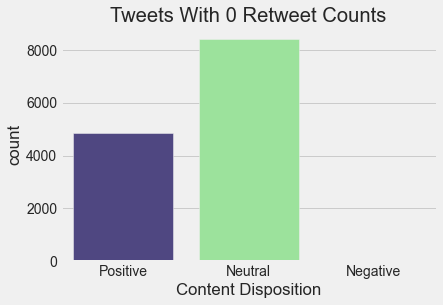

In [29]:
#  only TAMU Account 

rt_cnt_0 = dff[dff['retweet_count'] == 0]
sns.countplot(data = rt_cnt_0, x ='Content Disposition: supportive/affirming; contradicting/critical; cannot determine', palette=['darkslateblue','lightgreen','r'])
plt.title('Tweets With 0 Retweet Counts')
plt.xlabel('Content Disposition')

(7998, 40)


Text(0.5, 0, 'Content Disposition')

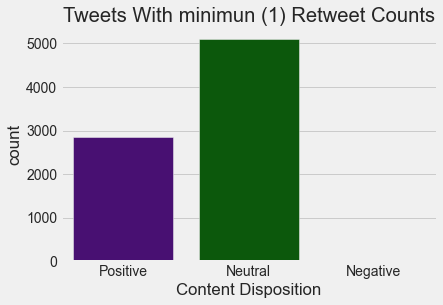

In [30]:
#  only TAMU Account 
rt_cnt_1 = dff[dff['retweet_count'] == 1]
print(rt_cnt_1.shape)
sns.countplot(data = rt_cnt_1, x ='Content Disposition: supportive/affirming; contradicting/critical; cannot determine', palette=['indigo','darkgreen','r'])
plt.title('Tweets With minimun (1) Retweet Counts')
plt.xlabel('Content Disposition')

In [31]:
df2.rename(columns = {'Content Disposition: supportive/affirming; contradicting/critical; cannot determine':'Content_Disposition'}, inplace = True)

C:\Users\nawsh\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [32]:
dff.rename(columns = {'Content Disposition: supportive/affirming; contradicting/critical; cannot determine':'Content_Disposition'}, inplace = True)

In [69]:
df.rename(columns = {'Content Disposition: supportive/affirming; contradicting/critical; cannot determine':'Content Disposition'}, inplace = True)

(5199, 42)


Text(0.5, 0, 'Content Disposition')

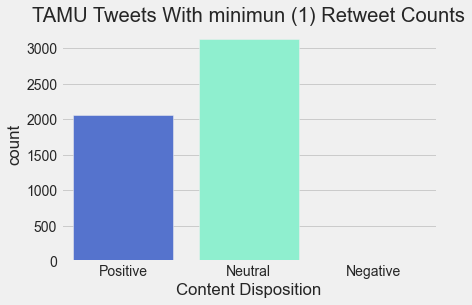

In [33]:
# df2 -> all TAMU accounts with both fav count & retweet count more than 0
df2_rt_cnt_1 = df2[df2['retweet_count'] == 1]
print(df2_rt_cnt_1.shape)
sns.countplot(data = df2_rt_cnt_1, x ='Content_Disposition', palette=['royalblue','aquamarine','r'])
plt.title('TAMU Tweets With minimun (1) Retweet Counts')
plt.xlabel('Content Disposition')

(1430, 42)


Text(0.5, 0, 'Content Disposition')

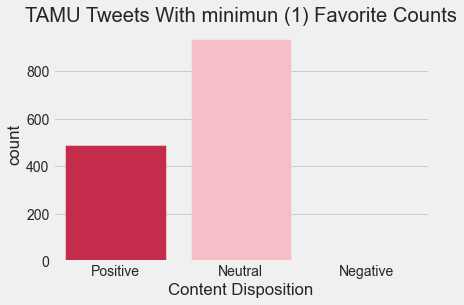

In [34]:
# df2 -> all TAMU accounts with both fav count & retweet count more than 0
df2_fvt_cnt_1 = df2[df2['favorite_count'] == 1]
print(df2_fvt_cnt_1.shape)
sns.countplot(data = df2_fvt_cnt_1, x ='Content_Disposition', palette=['crimson','lightpink','r'])
plt.title('TAMU Tweets With minimun (1) Favorite Counts')
plt.xlabel('Content Disposition')

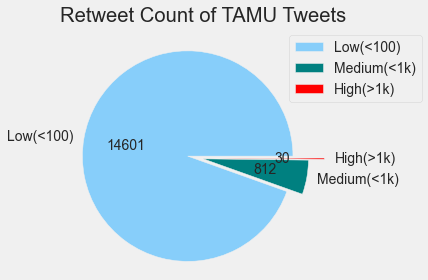

In [35]:
# retweet count
fig, ax = plt.subplots(1,1)
explode = [0.1, 0.05, 0.2]
label = ['Low(<100)', 'Medium(<1k)', 'High(>1k)']
numbers = [len(df2[(df2['rt_level'] == 'Low(<100)')]), len(df2[(df2['rt_level'] == 'Medium(<1k)')]), len(df2[(df2['rt_level'] == 'High(>1k)')])]
ax.pie(numbers, labels = label, explode = explode, autopct = lambda p: '{:.0f}'.format(p * np.sum(numbers) / 100), colors=['lightskyblue','teal','red'])
ax.axis('square')
ax.axis('equal')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1.05))
ax.set_title('Retweet Count of TAMU Tweets', y= 1.05)
plt.show()

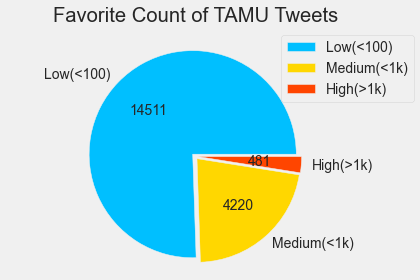

In [36]:
# favorite count
fig, ax = plt.subplots(1,1)
explode = [0.03, 0.03, 0.03]
label = ['Low(<100)', 'Medium(<1k)', 'High(>1k)']
numbers = [len(df2[(df2['fav_level'] == 'Low(<100)')]), len(df2[(df2['fav_level'] == 'Medium(<1k)')]), len(df2[(df2['fav_level'] == 'High(>1k)')])]
ax.pie(numbers, labels = label, explode = explode, autopct = lambda p: '{:.0f}'.format(p * np.sum(numbers) / 100), colors=['deepskyblue','gold','orangered'])
ax.axis('square')
ax.axis('equal')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1.05))
ax.set_title('Favorite Count of TAMU Tweets', y= 1.05)
plt.show()

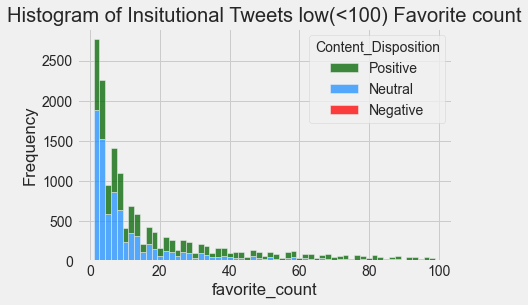

In [37]:
df31 = df2[df2['favorite_count'] <100]
sns.histplot(data=df31, hue='Content_Disposition', x = 'favorite_count', multiple="stack", palette=['darkgreen','dodgerblue','r'])
plt.title('Histogram of Insitutional Tweets low(<100) Favorite count')
plt.ylabel("Frequency")
plt.show()

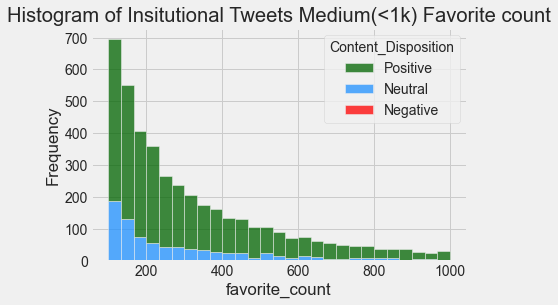

In [38]:
df32 = df2[(df2['favorite_count'] >=100) & (df2['favorite_count'] <1000)]
sns.histplot(data=df32, hue='Content_Disposition', x = 'favorite_count', multiple="stack", palette=['darkgreen','dodgerblue','r'])
plt.title('Histogram of Insitutional Tweets Medium(<1k) Favorite count')
plt.ylabel("Frequency")
plt.show()

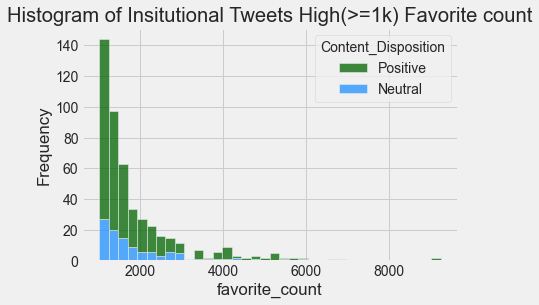

In [39]:
df33 = df2[df2['favorite_count'] >=1000]
sns.histplot(data=df33, hue='Content_Disposition', x = 'favorite_count', multiple="stack", palette=['darkgreen','dodgerblue'])
plt.title('Histogram of Insitutional Tweets High(>=1k) Favorite count')
plt.ylabel("Frequency")
plt.show()

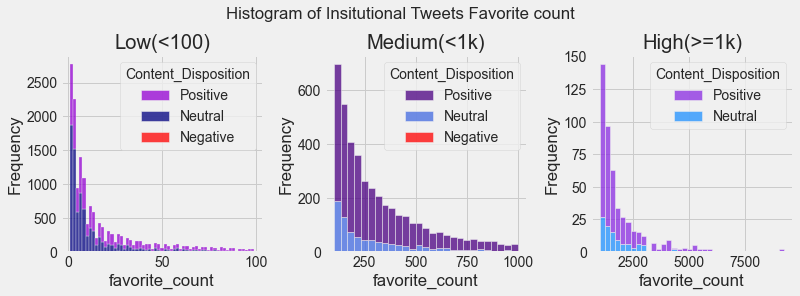

In [40]:
plt.style.use('seaborn-bright')
fig, ax = plt.subplots(1,3,  figsize = (11,4),constrained_layout=True)
sns.histplot(ax=ax[0],data=df31, hue='Content_Disposition', x = 'favorite_count', multiple="stack", palette=['darkviolet','navy','r'])
ax[0].set_title('Low(<100)')
ax[0].set_ylabel("Frequency")

sns.histplot(ax=ax[1],data=df32, hue='Content_Disposition', x = 'favorite_count', multiple="stack", palette=['indigo','royalblue','r'])
ax[1].set_title('Medium(<1k)')
ax[1].set_ylabel("Frequency")

sns.histplot(ax=ax[2],data=df33, hue='Content_Disposition', x = 'favorite_count', multiple="stack", palette=['blueviolet','dodgerblue'])
ax[2].set_title('High(>=1k)')
ax[2].set_ylabel("Frequency")

plt.suptitle('Histogram of Insitutional Tweets Favorite count')
# plt.tight_layout()
plt.show()

In [41]:
# df with favcount medium & high
df_fav_med_high = df2[(df2['favorite_count'] >=1000) | ((df2['favorite_count'] >=100) & (df2['favorite_count'] <1000))]
df_fav_med_high.shape

(4724, 42)

In [42]:
df_fav_med_high.Content_Disposition.value_counts()

Positive    3771
Neutral      952
Negative       1
Name: Content_Disposition, dtype: int64

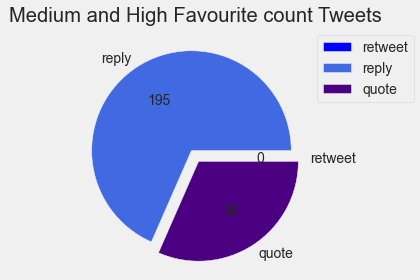

In [43]:
# favorite count
fig, ax = plt.subplots(1,1)
explode = [0.03, 0.1, 0.03]
label = ['retweet','reply','quote']
numbers = [len(df_fav_med_high[(df_fav_med_high['tweet_type'] == 'retweet')]),len(df_fav_med_high[(df_fav_med_high['tweet_type'] == 'reply')]), len(df_fav_med_high[(df_fav_med_high['tweet_type'] == 'quote')])]
ax.pie(numbers, labels = label, explode = explode, autopct = lambda p: '{:.0f}'.format(p * np.sum(numbers) / 100), colors=['blue','royalblue','indigo'])
ax.axis('square')
ax.axis('equal')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1.05))
ax.set_title('Medium and High Favourite count Tweets', y= 1.05)
plt.show()

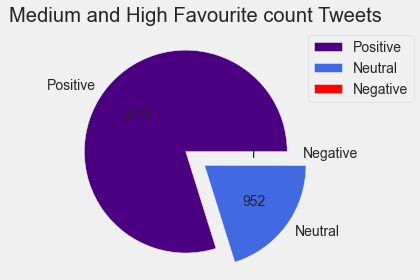

In [44]:
# favorite count
fig, ax = plt.subplots(1,1)
explode = [0.03, 0.2, 0.03]
label = ['Positive','Neutral','Negative']
numbers = [len(df_fav_med_high[(df_fav_med_high['Content_Disposition'] == 'Positive')]),len(df_fav_med_high[(df_fav_med_high['Content_Disposition'] == 'Neutral')]), len(df_fav_med_high[(df_fav_med_high['Content_Disposition'] == 'Negative')])]
ax.pie(numbers, labels = label, explode = explode, autopct = lambda p: '{:.0f}'.format(p * np.sum(numbers) / 100), colors=['indigo','royalblue','r'])
ax.axis('square')
ax.axis('equal')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1.05))
ax.set_title('Medium and High Favourite count Tweets', y= 1.05)
plt.show()

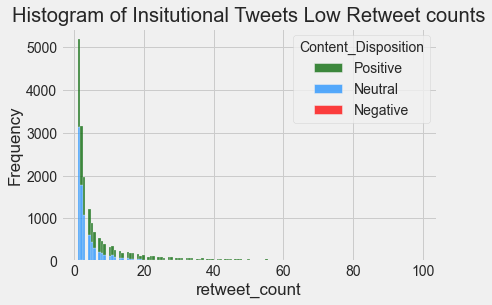

In [45]:
df4 = df2[df2['retweet_count'] <100]
sns.histplot(data=df4, hue='Content_Disposition', x = 'retweet_count', multiple="stack", palette=['darkgreen','dodgerblue','r'])
plt.title('Histogram of Insitutional Tweets Low Retweet counts')
plt.ylabel("Frequency")
plt.show()

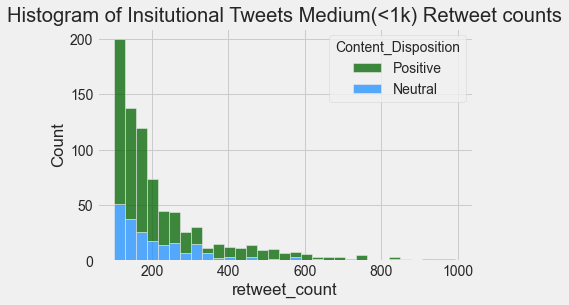

In [46]:
df44 = df2[(df2['retweet_count'] >= 100) & (df2['retweet_count'] <1000)]
sns.histplot(data=df44, hue='Content_Disposition', x = 'retweet_count', multiple="stack", palette=['darkgreen','dodgerblue'])
plt.title('Histogram of Insitutional Tweets Medium(<1k) Retweet counts')
plt.show()

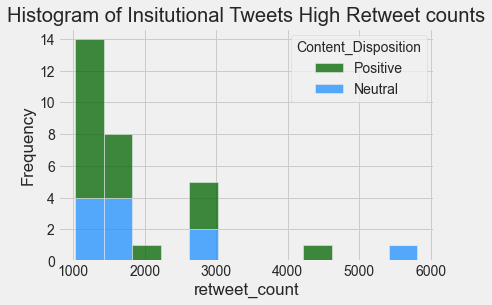

In [47]:
df45 = df2[df2['retweet_count'] >= 1000]
sns.histplot(data=df45, hue='Content_Disposition', x = 'retweet_count', multiple="stack", palette=['darkgreen','dodgerblue'])
plt.title('Histogram of Insitutional Tweets High Retweet counts')
plt.ylabel("Frequency")
plt.show()

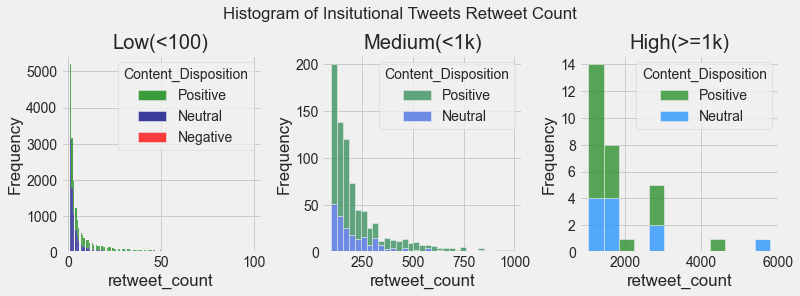

In [48]:
plt.style.use('seaborn-bright')
from matplotlib.ticker import MaxNLocator 

fig, ax = plt.subplots(1,3,  figsize = (11,4),constrained_layout=True)
sns.histplot(ax=ax[0],data=df4, hue='Content_Disposition', x = 'retweet_count', multiple="stack", palette=['green','navy','r'])
ax[0].set_title('Low(<100)')
ax[0].set_ylabel("Frequency")

sns.histplot(ax=ax[1],data=df44, hue='Content_Disposition', x = 'retweet_count', multiple="stack", palette=['seagreen','royalblue'])
ax[1].set_title('Medium(<1k)')
ax[1].set_ylabel("Frequency")

sns.histplot(ax=ax[2],data=df45, hue='Content_Disposition', x = 'retweet_count', multiple="stack", palette=['forestgreen','dodgerblue'])
ax[2].set_title('High(>=1k)')
ax[2].set_ylabel("Frequency")
y_ax = ax[2].axes.get_yaxis() 
y_ax.set_major_locator(MaxNLocator(integer=True))  ## Set major locators to integer values

plt.suptitle('Histogram of Insitutional Tweets Retweet Count')
# plt.tight_layout()
plt.show()

In [49]:
# df with favcount medium & high
df_rt_med_high = df2[(df2['retweet_count'] >=1000) | ((df2['retweet_count'] >=100) & (df2['retweet_count'] <1000))]
df_rt_med_high.shape

(849, 42)

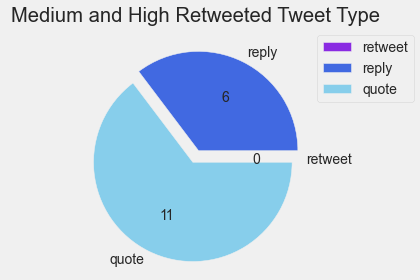

In [50]:
# favorite count
fig, ax = plt.subplots(1,1)
explode = [0.03, 0.1, 0.03]
label = ['retweet','reply','quote']
numbers = [len(df_rt_med_high[(df_rt_med_high['tweet_type'] == 'retweet')]),len(df_rt_med_high[(df_rt_med_high['tweet_type'] == 'reply')]), len(df_rt_med_high[(df_rt_med_high['tweet_type'] == 'quote')])]
ax.pie(numbers, labels = label, explode = explode, autopct = lambda p: '{:.0f}'.format(p * np.sum(numbers) / 100), colors=['blueviolet','royalblue','skyblue'])
ax.axis('square')
ax.axis('equal')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1.05))
ax.set_title('Medium and High Retweeted Tweet Type', y= 1.05)
plt.show()

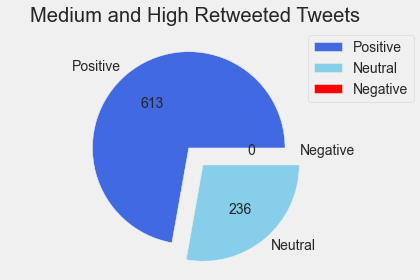

In [51]:
# favorite count
fig, ax = plt.subplots(1,1)
explode = [0.03, 0.2, 0.03]
label = ['Positive','Neutral','Negative']
numbers = [len(df_rt_med_high[(df_rt_med_high['Content_Disposition'] == 'Positive')]),len(df_rt_med_high[(df_rt_med_high['Content_Disposition'] == 'Neutral')]), len(df_rt_med_high[(df_rt_med_high['Content_Disposition'] == 'Negative')])]
ax.pie(numbers, labels = label, explode = explode, autopct = lambda p: '{:.0f}'.format(p * np.sum(numbers) / 100), colors=['royalblue','skyblue','r'])
ax.axis('square')
ax.axis('equal')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1.05))
ax.set_title('Medium and High Retweeted Tweets', y= 1.05)
plt.show()

In [52]:
df2[df2['Content_Disposition'] == 'Negative'].shape

(29, 42)

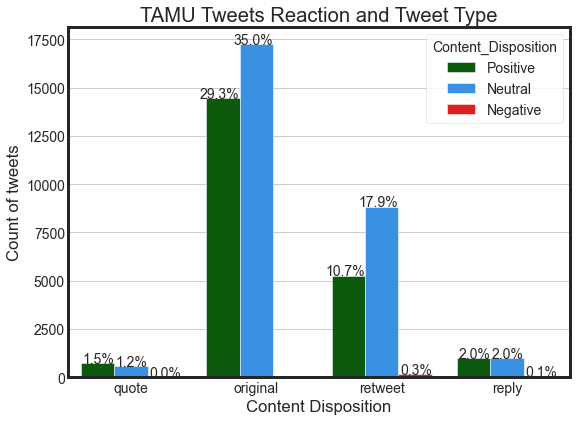

In [55]:
plt.style.use('fivethirtyeight')
sns.set_style("ticks",{'axes.grid' : True})
plt.figure(figsize=(8,6))
ax=sns.countplot(hue='Content_Disposition',
 x='tweet_type', data =dff,
 palette=['darkgreen','dodgerblue','r'])
plt.title('TAMU Tweets Reaction and Tweet Type')
plt.xlabel('Content Disposition')
plt.ylabel('Count of tweets')
# plt.grid(axis='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(dff))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')

plt.show()

In [56]:
dff.shape

(49337, 40)

In [57]:
dff['Content_Disposition'].value_counts()

Neutral     27679
Positive    21463
Negative      195
Name: Content_Disposition, dtype: int64

In [58]:
df_neg = dff[dff['Content_Disposition'] == 'Negative']
df_neg.tweet_type.value_counts()

retweet    149
reply       35
quote       11
Name: tweet_type, dtype: int64

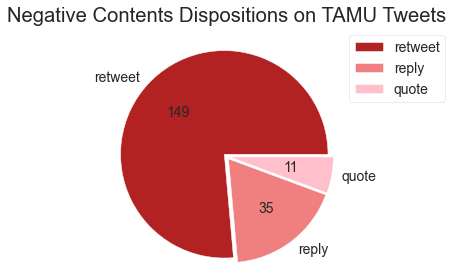

In [59]:
# favorite count
fig, ax = plt.subplots(1,1)
explode = [0.03, 0.03, 0.03]
label = ['retweet','reply','quote']
numbers = [len(df_neg[(df_neg['tweet_type'] == 'retweet')]),len(df_neg[(df_neg['tweet_type'] == 'reply')]), len(df_neg[(df_neg['tweet_type'] == 'quote')])]
ax.pie(numbers, labels = label, explode = explode, autopct = lambda p: '{:.0f}'.format(p * np.sum(numbers) / 100), colors=['firebrick','lightcoral','pink'])
ax.axis('square')
ax.axis('equal')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1.05))
ax.set_title('Negative Contents Dispositions on TAMU Tweets', y= 1.05)
plt.show()

In [60]:
df_exp = df[(df['tweet_type'] == 'retweet') | (df['tweet_type'] == 'reply') | (df['tweet_type'] == 'quote')]

In [61]:
df_exp.type.value_counts()

I     17610
P      6465
OI     3757
Name: type, dtype: int64

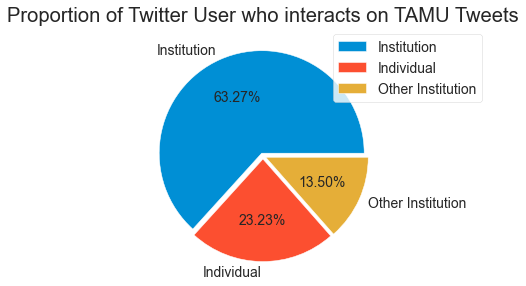

In [62]:
# proportions of twitter users
fig, ax = plt.subplots(1,1)
explode = [0.03, 0.03, 0.03]
label = ['Institution','Individual','Other Institution']
numbers = [len(df_exp[(df_exp['type'] == 'I')]),len(df_exp[(df_exp['type'] == 'P')]), len(df_exp[(df_exp['type'] == 'OI')])]
ax.pie(numbers, labels = label, explode = explode, autopct = '%.2f%%')
ax.axis('square')
ax.axis('equal')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1.05))
ax.set_title('Proportion of Twitter User who interacts on TAMU Tweets', y= 1.05)
plt.show()

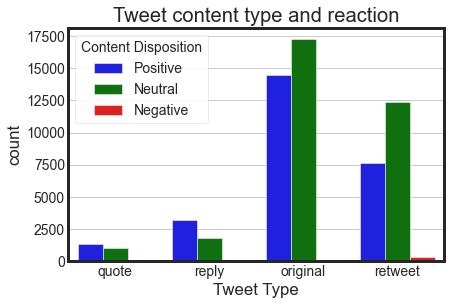

In [63]:
# sns.set_theme(palette = 'icefire' )
plt.figure()
sns.countplot(x='tweet_type', hue='Content Disposition: supportive/affirming; contradicting/critical; cannot determine',
 palette=['b','g','r'], data =df)
plt.title('Tweet content type and reaction')
plt.xlabel('Tweet Type')
plt.legend(title='Content Disposition')

plt.show()

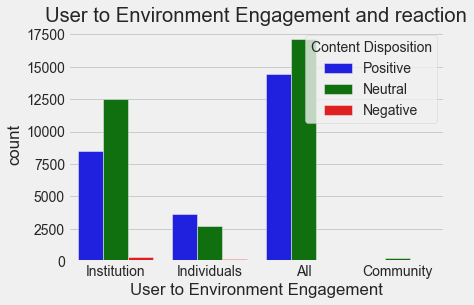

In [64]:
plt.style.use('fivethirtyeight')
plt.figure()
sns.countplot(x='User to Environment Engagement', 
    hue='Content Disposition: supportive/affirming; contradicting/critical; cannot determine', data =df,
    palette=['b','g','r'])
plt.title('User to Environment Engagement and reaction')
plt.xlabel('User to Environment Engagement')
plt.legend(title='Content Disposition', loc='upper right')

plt.show()

In [74]:
df.user_location.value_counts()

College Station, TX                   38958
Aggieland                              3776
Henderson Hall | Texas A&M             3763
Fort Worth, Texas                      3308
Texas A&M University                   3246
Texas                                  3173
Bryan, TX                              1489
Kingsville and College Station, TX      969
Bryan-College Station, Texas            881
Name: user_location, dtype: int64

In [73]:
# correcting locations
df['user_location'] = df['user_location'].map(lambda x: 'College Station, TX' if x=='College Station, Texas' else 'College Station, TX' if x=='College Station' else x)

In [75]:
df.user_location.value_counts()

College Station, TX                   38958
Aggieland                              3776
Henderson Hall | Texas A&M             3763
Fort Worth, Texas                      3308
Texas A&M University                   3246
Texas                                  3173
Bryan, TX                              1489
Kingsville and College Station, TX      969
Bryan-College Station, Texas            881
Name: user_location, dtype: int64

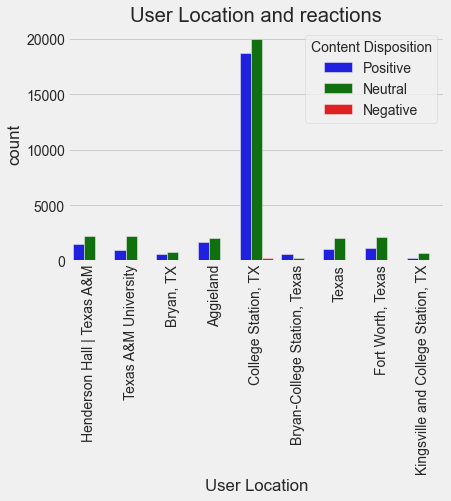

In [79]:
plt.figure()
sns.countplot(x='user_location', 
    hue='Content Disposition', data =df,
    palette=['b','g','r'])
plt.title('User Location and reactions')
plt.xlabel('User Location')
plt.legend(title='Content Disposition', loc='upper right')
plt.xticks(rotation=90)
plt.show()

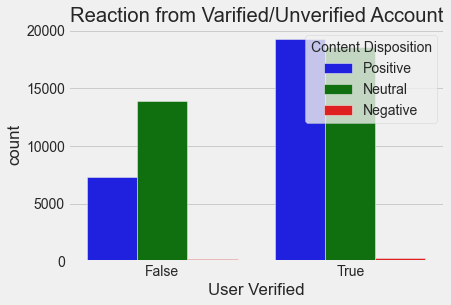

In [80]:
plt.figure()
sns.countplot(x='user_verified', 
    hue='Content Disposition', data =df,
    palette=['b','g','r'])
plt.title('Reaction from Varified/Unverified Account')
plt.xlabel('User Verified')
plt.legend(title='Content Disposition', loc='upper right')

plt.show()

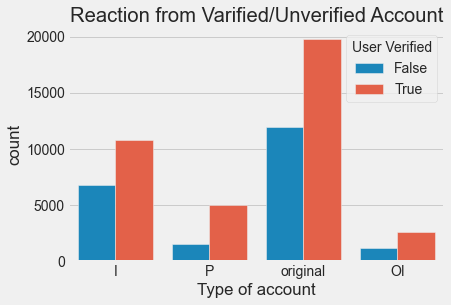

In [89]:
plt.figure()
sns.countplot(x='type', 
    hue='user_verified', data =df
    )
plt.title('Reaction from Varified/Unverified Account')
plt.xlabel('Type of account')
plt.legend(title='User Verified', loc='upper right')

plt.show()

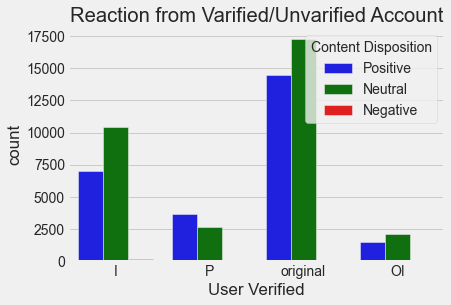

In [94]:
plt.figure()
sns.countplot(x='type', 
    hue='Content Disposition', data =df,
    palette=['b','g','r'])
plt.title('Reaction from Varified/Unvarified Account')
plt.xlabel('User Verified')
plt.legend(title='Content Disposition', loc='upper right')

plt.show()

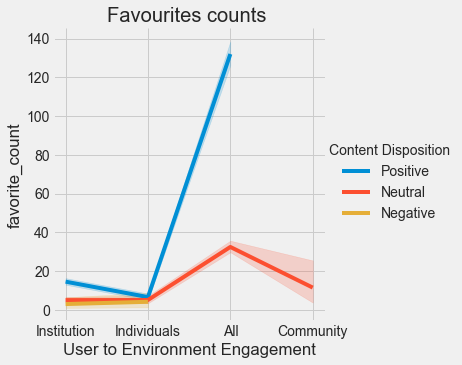

In [70]:

sns.relplot(data = df , x ='User to Environment Engagement', y = 'favorite_count', kind = 'line', hue ='Content Disposition')
plt.title('Favourites counts ')
plt.show()

0       6528
1       3462
2       2386
3       1888
4       1570
        ... 
935        1
967        1
999        1
1111       1
2031       1
Name: favorite_count, Length: 1285, dtype: int64

# Counts & Statistics


# End

In [103]:
df.columns

Index(['Unnamed: 0', 'id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'User to Environment Engagement', 'text',
       'tweet_type', 'Content Disposition', 'hashtags', 'media', 'urls',
       'favorite_count', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'lang', 'place', 'possibly_sensitive',
       'retweet_count', 'retweet_or_quote_id', 'retweet_or_quote_screen_name',
       'retweet_or_quote_user_id', 'source', 'user_id', 'user_created_at',
       'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'type'],
      dtype='object')

In [104]:
df['tweet_type'].value_counts()

original    31727
retweet     20393
reply        5088
quote        2355
Name: tweet_type, dtype: int64

In [113]:
total_tweets = df.shape[0]
total_original_tweets = df[df['tweet_type'] == 'original'].shape[0]
total_retweeted_tweets = df[df['tweet_type'] == 'retweet'].shape[0]
total_replied_tweets = df[df['tweet_type'] == 'reply'].shape[0]
total_quote_tweets = df[df['tweet_type'] == 'quote'].shape[0]

In [117]:
df.user_location.value_counts(1)

College Station, TX                   0.654064
Aggieland                             0.063395
Henderson Hall | Texas A&M            0.063177
Fort Worth, Texas                     0.055538
Texas A&M University                  0.054497
Texas                                 0.053271
Bryan, TX                             0.024999
Kingsville and College Station, TX    0.016268
Bryan-College Station, Texas          0.014791
Name: user_location, dtype: float64

In [119]:
df['Content Disposition'].value_counts(1)

Neutral     0.545893
Positive    0.446787
Negative    0.007320
Name: Content Disposition, dtype: float64

In [120]:
df[df['retweet_count'] < 100 ].shape[0]

56639

In [121]:
df[(df['retweet_count'] >= 100) & (df['retweet_count'] < 1000) ].shape[0]

2692

In [122]:
df[df['retweet_count'] >= 1000].shape[0]

232

In [123]:
df[df['favorite_count'] < 100 ].shape[0]

54656

In [124]:
df[(df['favorite_count'] >= 100) & (df['retweet_count'] < 1000) ].shape[0]

4877

In [125]:
df[df['favorite_count'] >= 1000].shape[0]

501

In [127]:
df['User to Environment Engagement'].value_counts(1)

All            0.530617
Institution    0.357427
Individuals    0.108414
Community      0.003543
Name: User to Environment Engagement, dtype: float64

In [146]:
df.type.value_counts(1)

original    0.532699
I           0.295673
P           0.108548
OI          0.063080
Name: type, dtype: float64

In [138]:
df[df['type'] == 'original'].user_verified.value_counts(1)

True     0.623349
False    0.376651
Name: user_verified, dtype: float64

In [143]:
df[df['type'] == 'I'].user_verified.value_counts(1)

True     0.614083
False    0.385917
Name: user_verified, dtype: float64

In [142]:
df[df['type'] == 'P'].user_verified.value_counts(1)

True     0.768291
False    0.231709
Name: user_verified, dtype: float64

In [145]:
df[df['type'] == 'OI'].user_verified.value_counts()

True     2566
False    1191
Name: user_verified, dtype: int64